In [76]:
import warnings
warnings.filterwarnings("ignore")

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.utils import shuffle, class_weight
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Read data

In [78]:
df_selected = pd.read_csv('./data/df_selected.csv')

In [79]:
df_selected.describe()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,application_type,acc_open_past_24mths,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history
count,457484.000000,457484.000000,457484.000000,457484.000000,457484.000000,457484.00000,457484.000000,457484.000000,457484.000000,457484.000000,...,457484.000000,457484.000000,457484.000000,457484.000000,457484.000000,457484.000000,457484.000000,457484.000000,457484.000000,457484.000000
mean,14560.685237,14560.685237,14555.374765,42.118666,13.297232,440.29019,1.844924,11.201323,5.766084,2.397426,...,0.003296,4.811952,1.773319,0.148659,0.056844,0.000026,5.567150,2014.678907,1998.224187,16.454720
std,8536.329074,8536.329074,8533.034966,10.459931,4.526475,254.19396,1.331678,6.579267,3.724258,1.425130,...,0.057319,3.156273,2.083654,0.398301,0.420798,0.005122,3.395717,0.786727,7.472356,7.430867
min,1000.000000,1000.000000,900.000000,36.000000,5.320000,14.01000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2014.000000,1944.000000,3.000000
25%,8000.000000,8000.000000,8000.000000,36.000000,9.990000,256.23000,1.000000,6.000000,2.000000,1.000000,...,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,3.000000,2014.000000,1994.000000,11.000000
50%,12400.000000,12400.000000,12400.000000,36.000000,12.990000,378.20000,2.000000,11.000000,6.000000,3.000000,...,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,5.000000,2015.000000,2000.000000,15.000000
75%,20000.000000,20000.000000,20000.000000,60.000000,15.990000,580.73000,3.000000,15.000000,10.000000,4.000000,...,0.000000,6.000000,3.000000,0.000000,0.000000,0.000000,9.000000,2015.000000,2003.000000,20.000000
max,40000.000000,40000.000000,40000.000000,60.000000,30.990000,1714.54000,6.000000,34.000000,10.000000,4.000000,...,1.000000,53.000000,47.000000,12.000000,85.000000,1.000000,11.000000,2017.000000,2014.000000,70.000000


In [80]:

def plot_feature(df, col_name, isContinuous):
    """
    Visualize a variable with and without faceting on the loan status.
    - col_name is the variable name in the dataframe
    - full_name is the full variable name
    - continuous is True if the variable is continuous, False otherwise
    """
    f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12,3), dpi=90)
    
    # Plot without loan status
    if isContinuous:
        sns.distplot(df.loc[df[col_name].notnull(), col_name], kde=False, ax=ax1)
    else:
        sns.countplot(df[col_name], order=sorted(df[col_name].unique()), color='#5975A4', saturation=1, ax=ax1)
    ax1.set_xlabel(col_name)
    ax1.set_ylabel('Count')
    ax1.set_title(col_name)
    plt.xticks(rotation = 90)

    # Plot with loan status
    if isContinuous:
        sns.boxplot(x=col_name, y='loan_status', data=df, ax=ax2)
        ax2.set_ylabel('')
        ax2.set_title(col_name + ' by Loan Status')
    else:
        data = df.groupby(col_name)['loan_status'].value_counts(normalize=True).to_frame('proportion').reset_index()        
        sns.barplot(x = col_name, y = 'proportion', hue= "loan_status", data = data, saturation=1, ax=ax2)
        ax2.set_ylabel('Loan fraction')
        ax2.set_title('Loan status')
        plt.xticks(rotation = 90)
    ax2.set_xlabel(col_name)
    
    plt.tight_layout()

### Vizualizations

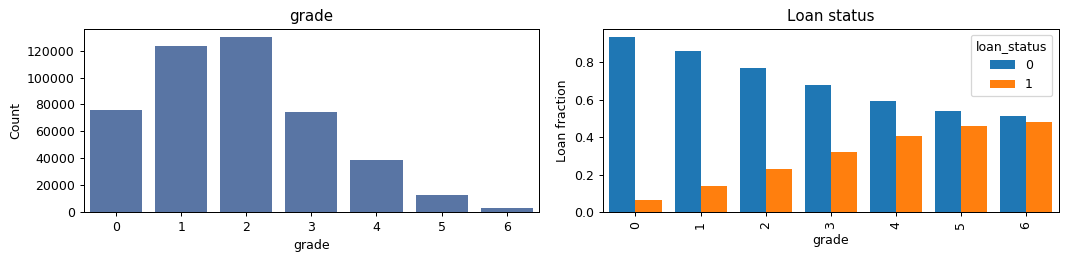

In [81]:
plot_feature(df_selected, 'grade', False)

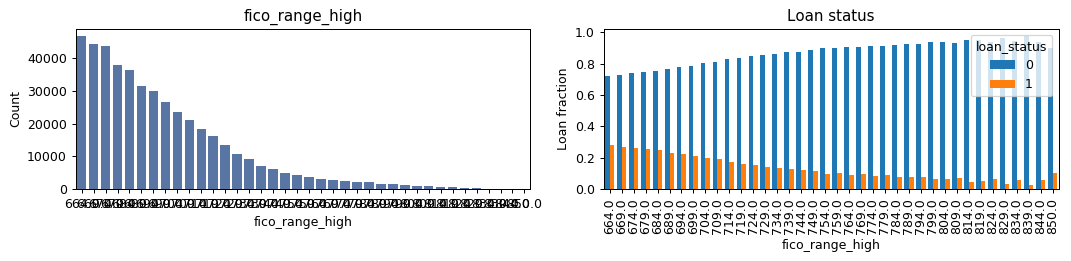

In [82]:
plot_feature(df_selected, 'fico_range_high', False)

In [83]:
df_selected['fico_grade'] = np.log1p(np.absolute(df_selected.fico_range_high * df_selected.grade**2))

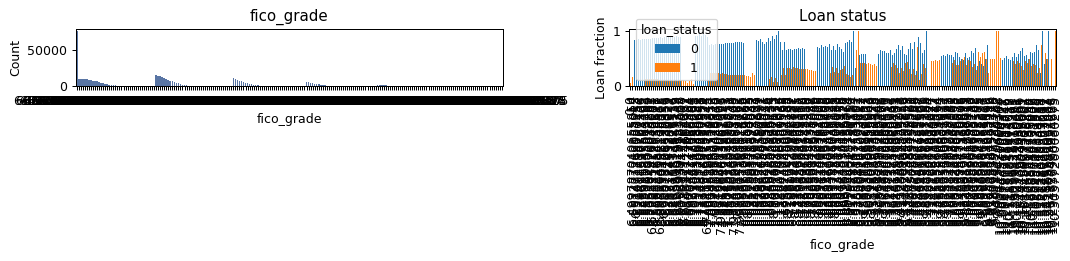

In [84]:
plot_feature(df_selected, 'fico_grade', False)

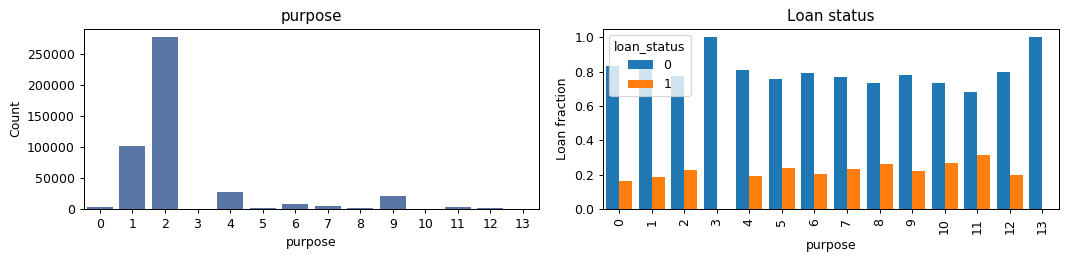

In [85]:
plot_feature(df_selected, 'purpose', False)

In [86]:
df_selected.groupby(['purpose', 'loan_status']).size().to_frame('count')

count
purpose loan_status        
0       0              3296
        1               663
1       0             83187
        1             19153
2       0            213471
        1             63008
3       0                 1
4       0             22291
        1              5300
5       0              1389
        1               446
6       0              6533
        1              1713
7       0              3669
        1              1107
8       0              2171
        1               779
9       0             17160
        1              4913
10      0               196
        1                72
11      0              2866
        1              1338
12      0              2195
        1               556
13      0                11

In [87]:
df_selected.issue_year.value_counts()

2015    218876
2014    208037
2017     30571
Name: issue_year, dtype: int64

### Feature correlations

In [88]:
corr = df_selected.corr()

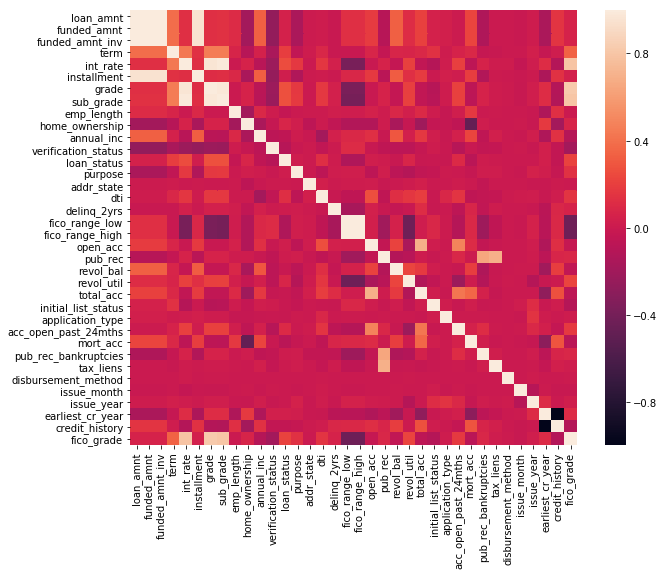

In [89]:
plt.figure(figsize = (10, 8))
sns.heatmap(corr)
plt.show()

In [90]:
corr['loan_status'].sort_values(ascending = False).to_frame('corr_value').reset_index()

,index,corr_value
0,loan_status,1.000000
1,sub_grade,0.275054
2,grade,0.269940
3,int_rate,0.255399
4,fico_grade,0.220453
5,term,0.193636
6,dti,0.123988
7,acc_open_past_24mths,0.097327
8,home_ownership,0.078022
9,revol_util,0.076245


In [91]:
df_selected.application_type.value_counts(normalize=True)

0    0.996704
1    0.003296
Name: application_type, dtype: float64

### Find highly correlated features

In [92]:
def find_high_correlated_features(frame):
    new_corr = frame.corr()
    new_corr.loc[:,:] = np.tril(new_corr, k=-1) # below main lower triangle of an array
    new_corr = new_corr.stack()
    print(new_corr[(new_corr > 0.4) | (new_corr < -0.4)])

In [95]:
print(df_selected.columns)

Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'fico_range_low', 'fico_range_high',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'application_type', 'acc_open_past_24mths',
       'mort_acc', 'pub_rec_bankruptcies', 'tax_liens', 'disbursement_method',
       'issue_month', 'issue_year', 'earliest_cr_year', 'credit_history',
       'fico_grade'],
      dtype='object')


In [96]:
find_high_correlated_features(df_selected)

funded_amnt           loan_amnt           1.000000
funded_amnt_inv       loan_amnt           0.999996
                      funded_amnt         0.999996
int_rate              term                0.435879
installment           loan_amnt           0.952673
                      funded_amnt         0.952673
                      funded_amnt_inv     0.952653
grade                 term                0.446887
                      int_rate            0.962951
sub_grade             term                0.454138
                      int_rate            0.985559
                      grade               0.976940
fico_range_high       fico_range_low      1.000000
revol_util            fico_range_low     -0.429507
                      fico_range_high    -0.429507
total_acc             open_acc            0.689583
acc_open_past_24mths  open_acc            0.482634
                      total_acc           0.428877
mort_acc              home_ownership     -0.477745
pub_rec_bankruptcies  pub_rec  

In [99]:
df_selected['loan_diff'] = np.absolute(df_selected.loan_amnt - df_selected.funded_amnt)

In [100]:
df_selected.drop(['funded_amnt','funded_amnt_inv', 'loan_diff'], axis=1, inplace=True)

In [101]:
df_selected['avg_fico_score'] = (df_selected['fico_range_high'] + df_selected['fico_range_low'])/2.0

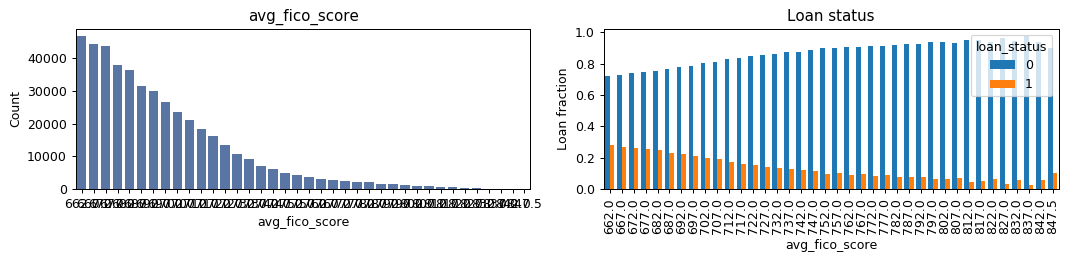

In [103]:
plot_feature(df_selected, 'avg_fico_score', False)

In [104]:
df_selected.drop(['fico_range_low','fico_range_high'], axis=1, inplace=True)

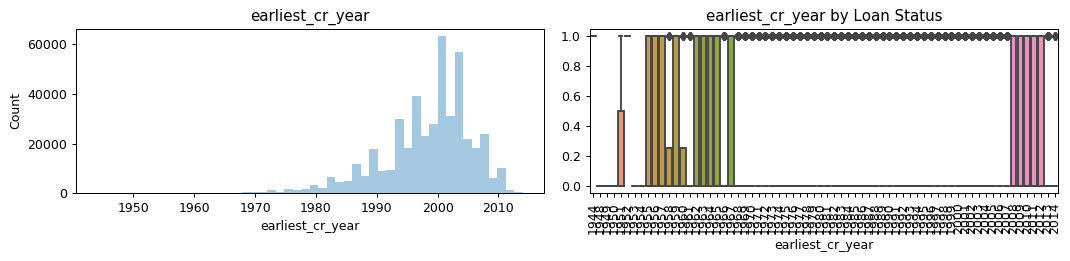

In [31]:
plot_feature(df_selected, 'earliest_cr_year', True)

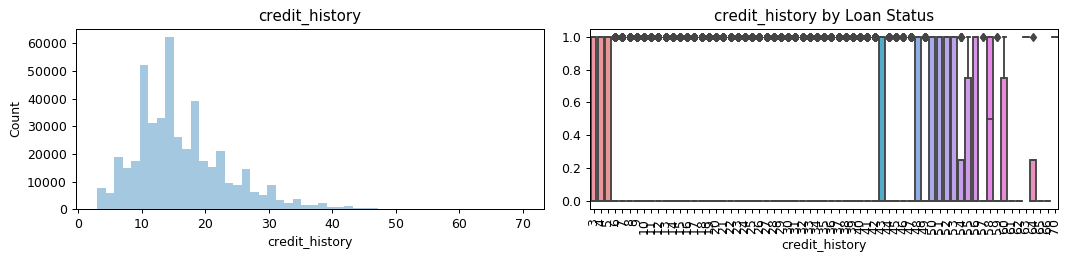

In [32]:
plot_feature(df_selected, 'credit_history', True)

In [33]:
df_selected.drop('earliest_cr_year', axis = 1, inplace=True)

In [105]:
find_high_correlated_features(df_selected)

int_rate              term                0.435879
installment           loan_amnt           0.952673
grade                 term                0.446887
                      int_rate            0.962951
sub_grade             term                0.454138
                      int_rate            0.985559
                      grade               0.976940
total_acc             open_acc            0.689583
acc_open_past_24mths  open_acc            0.482634
                      total_acc           0.428877
mort_acc              home_ownership     -0.477745
pub_rec_bankruptcies  pub_rec             0.642983
tax_liens             pub_rec             0.695931
credit_history        earliest_cr_year   -0.994442
fico_grade            int_rate            0.792840
                      grade               0.821197
                      sub_grade           0.798134
avg_fico_score        revol_util         -0.429507
                      fico_grade         -0.433501
dtype: float64


### Observe the selected features

In [106]:
df_selected.shape

(457484, 33)

In [107]:
df_selected.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,mort_acc,pub_rec_bankruptcies,tax_liens,disbursement_method,issue_month,issue_year,earliest_cr_year,credit_history,fico_grade,avg_fico_score
0,3600.0,36,7.49,111.97,0,3,10,1,120000.0,1,...,0.0,1.0,0.0,0,7,2017,1992,25,0.000000,722.0
1,35000.0,60,25.49,1037.38,4,23,10,1,114000.0,0,...,4.0,0.0,0.0,0,7,2017,1998,19,9.270965,662.0
2,17000.0,36,7.49,528.73,0,3,10,1,120000.0,1,...,2.0,1.0,0.0,0,7,2017,2005,12,0.000000,737.0
3,10000.0,36,11.49,329.72,1,9,10,3,145000.0,1,...,1.0,0.0,0.0,0,7,2017,2005,12,6.565265,707.0
4,5000.0,36,14.99,173.31,2,13,10,4,68000.0,1,...,0.0,0.0,0.0,0,7,2017,2003,14,7.884953,662.0


### Save selected features

In [108]:
features = pd.DataFrame([], columns = ['feature_name', 'unique_values'])
for i, col in enumerate(df_selected.columns):
    features.loc[i] = [col, len(np.unique(df_selected[col]))]

In [110]:
features.sort_values('unique_values')

,feature_name,unique_values
26,disbursement_method,2
10,loan_status,2
9,verification_status,2
21,application_type,2
20,initial_list_status,2
1,term,2
28,issue_year,3
7,home_ownership,5
4,grade,7
6,emp_length,11


In [116]:
cat_features = list(features[features.unique_values <=14 ]['feature_name'])

In [117]:
cat_features

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'loan_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'pub_rec_bankruptcies',
 'disbursement_method',
 'issue_month',
 'issue_year']

In [118]:
cat_features.remove('loan_status')

In [119]:
cat_features

['term',
 'grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'initial_list_status',
 'application_type',
 'pub_rec_bankruptcies',
 'disbursement_method',
 'issue_month',
 'issue_year']

In [120]:
df_hot_encodded = pd.get_dummies(df_selected, columns = cat_features)

In [121]:
df_hot_encodded.shape

(457484, 94)

In [122]:
df_hot_encodded.to_csv('./data/df_final.csv')